# Calculate a Cross-Correlation between 2 spectra
Start by importing some useful routines

In [1]:
import numpy                      as np
import sys
sys.path.insert(0, "../../..")     # This should allow the PDielec modules to be found
from PDielec.HelperRoutines   import getMaterial
from PDielec.HelperRoutines   import calculatePowderSpectrum
from PDielec.HelperRoutines   import calculateSingleCrystalSpectrum


## Read a DFT calculation on Na2SO42 which was created with CASTEP

The CASTEP files are in the directory Na2SO42/

In [2]:
na2so42 = getMaterial('Na2SO42/Castep/phonon.castep')
matrix = getMaterial('nujol')

## Calculate the absorption using effective medium theory

The calculatePowderSpectrum() routine returns the powder spectrum in units of $cm^{-1}$


In [3]:
calculated_frequencies = np.arange(10,500,0.2)
calculated_spectrum,calculated_permittivity = calculatePowderSpectrum(calculated_frequencies,na2so42,matrix,0.1) # Default is Maxwell-Garnett

## Read in a previously calculated spectrum
Now lets read in a spectrum from an xlsx file.  The file experimental_spectrum.xlsx in directory Na2SO42/ was created by a similar calculation
to that shown above.  The script for the calculaton, script.py, is in the directory Na2SO42/.  
It was calculated using a ptfe substrate in a volume fraction of 0.1.  So the only difference is the change in matrix permittivity from nujol to ptfe.

In [4]:
from PDielec.GUI.FitterTab import read_experimental_file, resample_experimental_spectrum
from PDielec.GUI.FitterTab import calculateCrossCorrelation, calculateSpectralDifference
experimental_frequencies, experimental_spectrum = read_experimental_file('Na2SO42/experimental_spectrum.xlsx')
experimental_frequencies = np.array(experimental_frequencies)
experimental_spectrum = np.array(experimental_spectrum)

## Compare spectra
To illustrate how similar the spectra are, lets plot them together

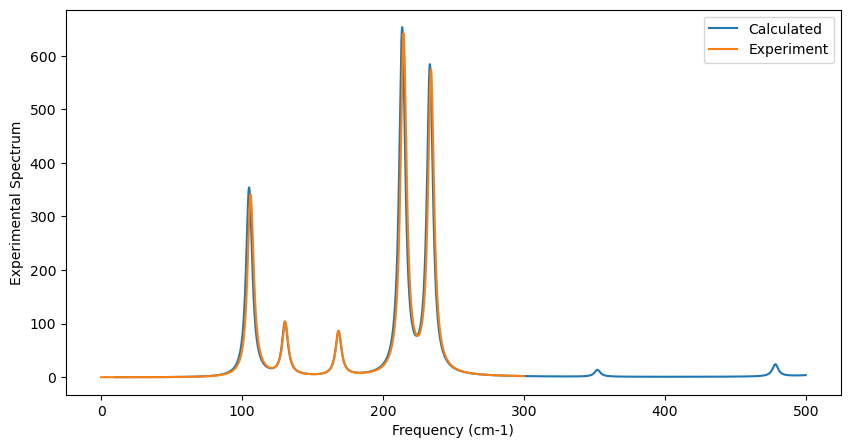

(<matplotlib.legend.Legend at 0x73afdb14b250>, None)

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(calculated_frequencies, calculated_spectrum,label='Calculated')
plt.plot(experimental_frequencies, experimental_spectrum,label='Experiment')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Experimental Spectrum')
plt.legend(), plt.show()

## Resample the experimental spectrum
To calculate the cross-correlation between the 2 spectra we need to choose a common set of frequencies.
In this case we choose the calculated_frequencies as the common set of frequencies.  The call to resample_experimental_spectrum
takes the experimental_frequencies and spectrum and returns an experimental spectrum at the calculated frequencies.

In [6]:
experimental_spectrum = resample_experimental_spectrum(calculated_frequencies, experimental_frequencies, experimental_spectrum)

## Calculate the correlation coefficients
Now we can calculate the cross-correlation coefficient and the root mean squared deviation between the spectra.  Note that *experimental_spectrum* has been resampled so it is tabulated at the same frequencies as the calculated spectrum

The meaning of the parameters is as follows:
- *Lag* is the shift in frequency of the calculated spectrum which would give the maximum correlation
- *max_corr* is the maximum correlation if the shift is performed
- *centre_corr* is the correlation if no shift is performed
- *rms* is the root means squared deviation between the calculated and experimental spectra, the calculated and experimental are both normalised so that the experimental spectra maximum is 1.

In [7]:
lag,max_corr,centre_corr = calculateCrossCorrelation(calculated_frequencies, calculated_spectrum, experimental_spectrum)
rms = calculateSpectralDifference(calculated_frequencies, calculated_spectrum, experimental_spectrum)
print('Lag                                   ', lag)
print('Maximum correlation (after lag shift) ',max_corr)
print('Correlation with no frequency shift   ',centre_corr)
print('RMS                                   ',rms)

Lag                                    0.9999999999999964
Maximum correlation (after lag shift)  0.9704276500637818
Correlation with no frequency shift    0.9312858085058254
RMS                                    0.06839771040791252
